# Question:
In the Atari game Blackjack, suppose a player keeps playing until they win their first hand. If the probability of winning a single hand is 42%, what is the probability that the player wins for the first time on their 5th hand?

# Study Description:
This simulation estimates the probability that a player wins for the first time on their 5th hand. We assume each hand is independent, the probability of winning a single hand is 42%, as shown in google, and that the player continues playing until they achieve their first win.

Each trial simulates multiple hands using a random process: for each hand, a random number determines if the player wins (success) or loses (failure) according to probability 42%. We record the number of hands it takes to win the first hand. Repeating this process for many trials allows us to estimate the probability of winning specifically on the 5th hand, as well as the mean and standard deviation of the number of hands until first win. We then compare the simulation to the theoretical geometric distribution, where P(first win on 5th hand) = (1-p)^4 times p. The 4 comes from the 4 losses before we win on the 5th trial.

In [26]:
!pip install gymnasium
!pip install "gymnasium[atari]"
!pip install "gymnasium[toy-text]"
!pip install ale-py
!pip install autorom[accept-rom-license]

In [27]:
import ale_py
import gymnasium as gym

# Register the ALE environments
gym.register_envs(ale_py)

# Now check the registry
gym.pprint_registry()

===== classic_control =====
Acrobot-v1                  CartPole-v0                 CartPole-v1
MountainCar-v0              MountainCarContinuous-v0    Pendulum-v1
===== phys2d =====
phys2d/CartPole-v0          phys2d/CartPole-v1          phys2d/Pendulum-v0
===== box2d =====
BipedalWalker-v3            BipedalWalkerHardcore-v3    CarRacing-v3
LunarLander-v3              LunarLanderContinuous-v3
===== toy_text =====
Blackjack-v1                CliffWalking-v1             CliffWalkingSlippery-v1
FrozenLake-v1               FrozenLake8x8-v1            Taxi-v3
===== tabular =====
tabular/Blackjack-v0        tabular/CliffWalking-v0
===== None =====
Ant-v2                      Ant-v3                      GymV21Environment-v0
GymV26Environment-v0        HalfCheetah-v2              HalfCheetah-v3
Hopper-v2                   Hopper-v3                   Humanoid-v2
Humanoid-v3                 HumanoidStandup-v2          InvertedDoublePendulum-v2
InvertedPendulum-v2         Pusher-v2             

In [28]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import time
import seaborn as sns
import numpy as np

# Create environment
env = gym.make("Blackjack-v1", render_mode="human")
observation, info = env.reset()

episode_over = False
total_reward = 0

while not episode_over:
    for i in range(100):
        # Choose an action: 0 = push cart left, 1 = push cart right
        action = env.action_space.sample()  # Random action for now - real agents will be smarter!
    
        # Take the action and see what happens
        observation, reward, terminated, truncated, info = env.step(action)
    
        # reward: +1 for each step the pole stays upright
        # terminated: True if pole falls too far (agent failed)
        # truncated: True if we hit the time limit (500 steps)
    
        total_reward += reward
        episode_over = terminated or truncated

print(f"Episode finished! Total reward: {total_reward}")
env.close()

Episode finished! Total reward: -99.0


Simulated P(first win on 5th hand) = 0.0487
Theoretical P(first win on 5th hand) = 0.0475
Simulated Mean = 2.38
Simulated Standard Deviation = 1.85


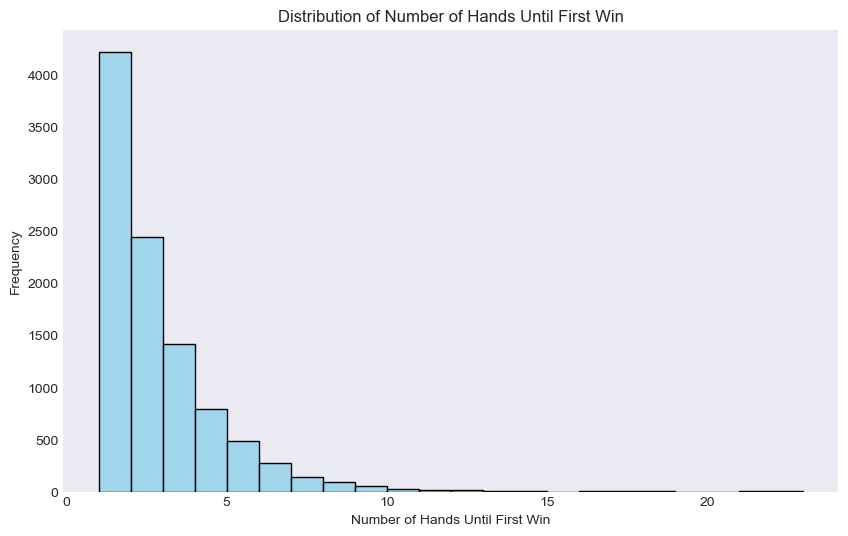

In [29]:
# Simulation parameters
p = 0.42  # probability of winning a single hand
num_trials = 10000  # increase for smoother results

hands_until_win = []

# Simulation
for _ in range(num_trials):
    hand_count = 0
    won = False
    while not won:
        hand_count += 1
        if np.random.rand() < p:  # win with probability p
            won = True
    hands_until_win.append(hand_count)

hands_until_win = np.array(hands_until_win)

# Probability of winning for the first time on the 5th hand
prob_first_win_5th = np.mean(hands_until_win == 5)
print(f"Simulated P(first win on 5th hand) = {prob_first_win_5th:.4f}")

# Theoretical probability
theoretical_prob_5th = (1 - p)**4 * p
print(f"Theoretical P(first win on 5th hand) = {theoretical_prob_5th:.4f}")

# Summary statistics
mean_hands = np.mean(hands_until_win)
std_hands = np.std(hands_until_win)
print(f"Simulated Mean = {mean_hands:.2f}")
print(f"Simulated Standard Deviation = {std_hands:.2f}")

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(hands_until_win, bins=range(1, max(hands_until_win)+2),
             kde=False, color='skyblue', edgecolor='black')
plt.title("Distribution of Number of Hands Until First Win")
plt.xlabel("Number of Hands Until First Win")
plt.ylabel("Frequency")
plt.show()

# Analysis:

In the Atari game Blackjack, if a player keeps playing until they win their first hand and the probability of winning a single hand is 42%, the probability that the player wins for the first time on their 5th hand is approximately 4.75%.

This result can be justified with two pieces of quantitative evidence:

- Empirical evidence from simulation: Running a simulation of many trials, we observed that the first win occurred on the 5th hand in about 4.87% of trials.

- Theoretical evidence from the geometric distribution: Using the formula P(first win on 5th hand) = (1-p)^4 times p, we calculate (1-0.42)^4 times 0.42 ≈ 0.0475, which closely matches the simulation result.

Both the simulation and theoretical calculation consistently show that the probability is just under 5%, illustrating how the geometric distribution accurately models the situation of "first win on a specific hand."